# Modelos de Regresión Lineal

## Repaso

Para los modelos de regresión lineal supondremos que la relación entre el `variable dependiente` ($y$) y las `variables independientes` ($X$) tiene la siguiente forma:

\begin{equation}
y = \beta_0 + \beta_1x + \beta_2x_2 + \dots + \beta_p x_p + \epsilon
  = \beta_0 + \sum_{j=1}^{p} \beta_j x_j + \epsilon
\end{equation}

Este modelo esta compuesto por sus **parámetros** $\beta_j$, uno para cada **variable independiente** $x_j$ donde $j=1, \ldots, p$ más la `ordenada al origen` ($\beta_0$), y el ruido aleatorio o **residuo/error** que solemos suponer normal: $\epsilon\sim N(0,\sigma^2)$. Es decir que si consideramos la matriz de entrenamiento `X_train`, esta tendra $p$ columnas y $n$ filas donde $n$ es la cantidad de datos de entrenamiento.

Para entrenar el modelo tenemos que calcular los valores de los parametros $\beta$ (todos), lo que se suele hacer es minimizar la función de costo $\cal L(\beta_0, \ldots, \beta_p)$:

\begin{equation}
\cal L(\beta) =  \frac{1}{n}\sum_{i=1}^{n} \big (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})) ^2
\end{equation}

Podemos simplificar la expresión escribiendo los errores o residuos (muestrales) $e_i = y_i-y_i^*$ donde la prediccion del modelo será $y_i^* = \beta_0 + \sum_{j=1}^p \beta_{j} x_{ij}$:

\begin{equation}
\cal L(\beta) = \frac{1}{n} \sum_{i=1}^{n} e^2
\end{equation}

Una manera de medir qué tan bien mi modelo de regresión se ajusta a los datos es calcular el coeficiente de determinación ($R^2$). El $R^2$
representa la proporción de la variabilidad de mis datos explicada por el modelo. Si $R^2 = 1$ eso quería decir que toda la variabilidad de los datos es explicada por una ecuación lineal.

\begin{equation}
\cal R^2 = \frac{Var. explicada}{Var. total}
\end{equation}

---
**Nota importante:**
Los modelos lineales tienen una serie de supuestos que se pueden resumir en:

-    *Linealidad*: La relación entre la variable dependiente ($Y$) y la variable independiente ($X$) debe ser lineal
-    *Normalidad de los residuos*: Los residuos deben tener una distribución normal.
-    *Homogeneidad de la varianza de los residuos*: Los residuos deben tener una varianza constante (homocedasticidad).
-    *Independencia de los residuos*: Los residuos deben ser independientes los unos de los otros, no deben estar correlacionados entre sí.

---


## Ejemplo de juguete

Vamos a inventarnos un dataset. Va a constar de una variable dependiente (y = cantidad de unidades vendidas) y una variable independiente: precio por unidad(x_0).

El dataset va a ser "sintético", creado por nosotros mismos. Primero inventamos valores para el precio por unidad y la inversión publicitaria:

In [ ]:
import numpy as np

precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])


In [ ]:
precio

array([ 24,  30,  43, 101,  34,  94,  10,  15,  12,  44, 202, 156,  90])

Ahora, vamos a construir la variable dependiente, "ventas". Para construirla vamos a considerar que mantiene una relación lineal con las otras dos variables (precio y gasto). En particular, vamos a hacer que el coeficiente relacionado con **precio** sea negativo. ¿Qué quiere decir esto?

Por otro lado, para hacer más "realista" el ejemplo, vamos a sumar un error aleatorio a cada observación:

In [ ]:
X = precio.reshape(-1, 1) # esto es necesario para transformar el vector en matriz

print(X.shape)

beta0, beta = 100, -0.3 #defino la ordenada al origen y la pendiente

mu, sigma = 0, 5   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(np.transpose(X),beta)+ beta0 + epsilon).round()
y = np.transpose(y)

print(X.tolist())
print(y.tolist())

(13, 1)
[[24], [30], [43], [101], [34], [94], [10], [15], [12], [44], [202], [156], [90]]
[[93.0], [97.0], [77.0], [65.0], [85.0], [71.0], [89.0], [98.0], [93.0], [89.0], [37.0], [61.0], [77.0]]


Podemos hacer el plot de una variable contra la otra y ver que sugiere que existe una relación lineal entre ambas:

Text(0.5, 0, 'Precio por unidad')

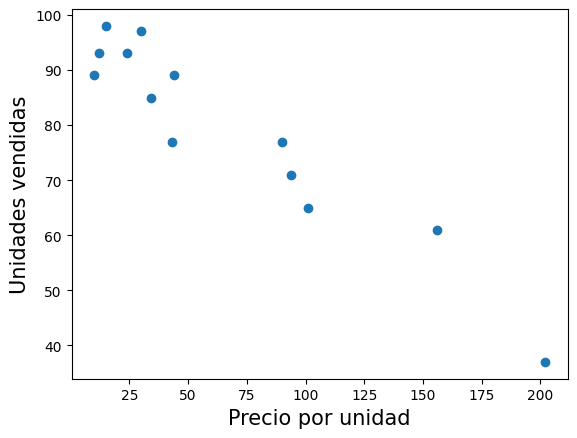

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

Vimos que el objetivo de la regresión lineal es encontrar parámetros $\beta_0$, $\beta_1$ tales que minimicen el error cuadrático medio. Esto lo vamos a hacer más adelante con scikit-learn.

Antes, podemos ilustrar el problema a resolver de la siguiente manera. Definamos una función que encuentra el error cuadrático medio dados parámetros $\beta_0$, $\beta_1$.

In [ ]:
def error_cuadratico_medio(X,y,beta):
  error=0.0
  for n,val in enumerate(y):
    y_est = beta[0] + beta[1]*X[n]
    error = error + (y_est - y[n])**2
  return error/len(y)

Ahora puedo adivinar valores de los  $\beta$ y obtener el error asociado:

In [ ]:
print(error_cuadratico_medio(X,y,[60,0.4]))
print(error_cuadratico_medio(X,y,[60,-0.4]))
print(error_cuadratico_medio(X,y,[90,-0.3]))
print(error_cuadratico_medio(X,y,[100,-0.3])) # este es el valor real de los parametros

[1595.60615385]
[2161.02153846]
[109.46692308]
[27.15923077]


Podemos visualizar la curva tridimensional que tengo que minimizar para encontrar los parametros: la curva del error cuadratico medio vs. $\beta_0$ y $\beta_1$.

Text(0.5, 0.5, 'Beta1')

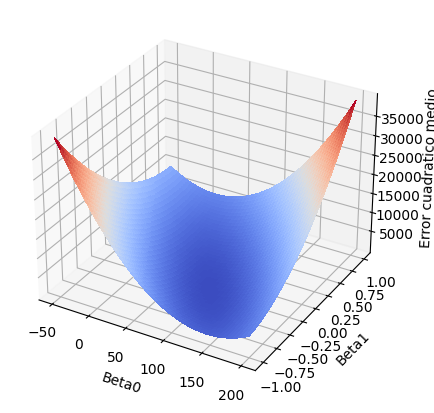

In [ ]:
beta0 = np.arange(-50,200,0.25)
beta = np.arange(-1,1,0.01)
X0, Y0 = np.meshgrid(beta0, beta)

Z = error_cuadratico_medio(X,y,[X0,Y0])

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5, 5))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('Error cuadratico medio')
ax.set_xlabel('Beta0')
ax.set_ylabel('Beta1')

Ahora ajustamos un modelo de regresión lineal a los datos usando sci-kit learn.

El proceso de ajustar modelos con scikit-learn es siempre el mismo:

1.   Creamos un objeto que representa el modelo, pasándole los parámetros correspondientes.
2.   Entrenamos el modelo con los datos.
3.   Usamos el modelo para predecir el valor de nuevos datos.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_]  # los parametros estimados
print(estimated)

R2 = reg.score(X,y) # R2
print(R2)

[array([97.73773952]), array([[-0.27905335]])]
0.9116296890087703


Vamos a graficar la recta teórica junto con la que mejor ajusta los datos.

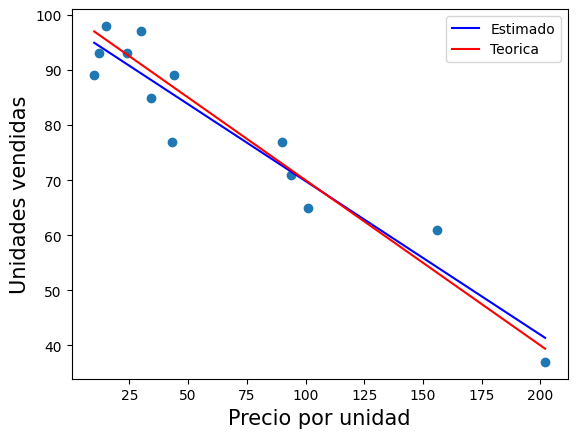

In [ ]:
plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

x_var = np.arange( X.min(), X.max(), 0.001)
y_var = estimated[0] + x_var*estimated[1]
y_var_est = 100 + x_var*(-0.3)


x = np.arange(25,200,1)
ypred = reg.predict(x.reshape(-1, 1))
plt.plot(x_var,np.transpose(y_var),label="Estimado", color='b')
plt.plot(x_var,np.transpose(y_var_est),label="Teorica", color='r')

plt.legend(loc='upper right')

## Ejemplo: Dataset de diabetes

El dataset "diabetes" contiene un total de 442 observaciones y 10 variables (características) numéricas.

El target o variable dependiente en el dataset es la **progresión de la diabetes** en un año. Esta variable representa la medida de la progresión de la enfermedad en un año para cada paciente en el estudio. Es un valor numérico continuo que indica la magnitud de la progresión de la diabetes en un año, y se utiliza como la variable objetivo en los modelos de regresión construidos con este dataset.

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
diabetes_data = load_diabetes()
diabetes = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
diabetes['target'] = diabetes_data['target']
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


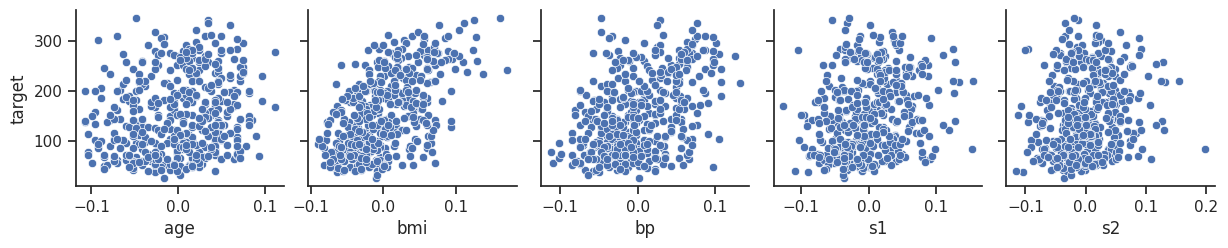

In [ ]:
# Visualización de algunas variables utilizando Seaborn
sns.set(style='ticks')
sns.pairplot(diabetes, x_vars=['age', 'bmi', 'bp', 's1', 's2'], y_vars='target', kind='scatter')
plt.show()

### Entrenamos un modelo lineal: split
Creemos una separación de datos, para eso usaremos un split de `train`, `val` y `test`. El test no lo utilizaremos hasta tener el mejor de todos los modelos:

![image.png](https://cdn.shortpixel.ai/spai/q_lossy+w_730+to_webp+ret_img/https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

In [ ]:
# Separación del dataset en train, dev y test
X = diabetes.drop('target', axis=1)
y = diabetes['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

¿Cuántos datos tengo en cada conjunto?

In [ ]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (309, 10)
Tamaño del conjunto de validación: (66, 10)
Tamaño del conjunto de prueba: (67, 10)


In [ ]:
# Creación y entrenamiento del modelo de regresión lineal
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_clasica = reg_linear.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_clasica = mean_squared_error(y_val, y_val_pred_clasica)

print("Error cuadrático medio (Clásica):", mse_clasica)



Error cuadrático medio (Clásica): 2499.3212346817413


### Interpretación de los $\beta$
Si tenemos en general a los **features normalizados** con media 0 y varianza 1, y son independientes entre si (o en su defecto poco correlacionados), los $\beta$ **se pueden interpretar de alguna manera como un proxy de importancia**. Esto quiere decir que el valor del coeficiente me dice cuanto aporta la variación en el feature correspondiente al cambio en el target. Por ejemplo, si el coeficiente $\beta_j$ es negativo, aumentar el feature $x_j$ correspondiente impacta disminuyendo el valor del target.

In [ ]:
#valor de la ordenada al origen(b0)
reg_linear.intercept_

151.00821291456543

In [ ]:
#valores de las pendientes(m) para cada variable x
reg_linear.coef_

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

In [ ]:
coef = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(reg_linear.coef_)})

[Text(0, 0, 'age'),
 Text(1, 0, 'sex'),
 Text(2, 0, 'bmi'),
 Text(3, 0, 'bp'),
 Text(4, 0, 's1'),
 Text(5, 0, 's2'),
 Text(6, 0, 's3'),
 Text(7, 0, 's4'),
 Text(8, 0, 's5'),
 Text(9, 0, 's6')]

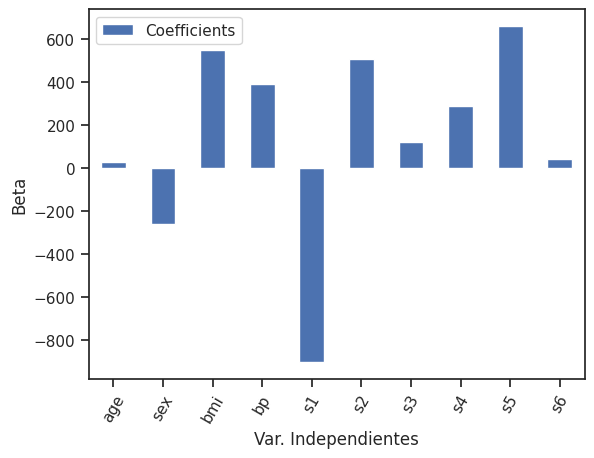

In [ ]:
ax = coef.plot.bar()
ax.set_xlabel("Var. Independientes")
ax.set_ylabel("Beta")
ax.set_xticklabels(coef.Feature, rotation=60)

# Modelos Lineales con Regularización

La regularización de un modelo lineal se refiere a la técnica utilizada para evitar el sobreajuste (overfitting) del modelo. Es decir, se evita que el modelo ajuste demasiado a los datos de entrenamiento para mejorar el desempeño en la predicción de nuevos datos.

Una de las formas estandar de regularizar un modelo es mediante la penalizacion de los valores de los parametros de nuestro modelo. En regresion lineal existen dos maneras muy usuales de hacer: penalizacion Ridge o Lasso. La principal diferencia entre estas técnicas es cómo tratan los coeficientes del modelo.
Ridge tiende a reducir todos los coeficientes, mientras que Lasso tiene el efecto de reducir algunos coeficientes a cero, eliminando así algunos predictores del modelo.

Estos metodos introducen un nuevo hiperparametro (en general representados con la letra $\lambda$ o en el caso de regresion lineal se suele utilizar $\alpha$) que modula que tanto queremos penalizar el modelo. Valores altos de este hiperparametros penalizaran fuertemente el modelo tendiendo a reducir fuertemente la varianza.

## Regularización Ridge ($L^2$)

La penalización utilizada por el modelo Ridge queda de la siguiente manera:

\begin{equation}
\cal L(\beta, \alpha) = \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})) ^2 + \alpha \sum_{j=1}^{p} {\beta_j}^2
\end{equation}

donde:

- $y$ es la variable de respuesta
- $\beta_0$ es el intercept
- $x_j$ es la $j$-ésima variable predictora/feature
- $\beta_j$ es el coeficiente correspondiente a la $j$-ésima variable predictora
- $\alpha$ es el **hiperparámetro** de regularización que controla la fuerza de la penalización de la magnitud de los coeficientes.

*Nota*: La última parte de la ecuación, $\sum_{j=1}^{p} \beta_j^2$, es la función de penalización $L^2$ regulada por $\alpha>0$ que penaliza más fuertemente a los coeficientes más grandes.

In [ ]:
# Creación y entrenamiento del modelo de regresión con Ridge
reg_ridge = Ridge(alpha=0.1) # Seleccionamos un valor de alpha (hiperparámetro) de 0.1
reg_ridge.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_ridge = reg_ridge.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)

print("Error cuadrático medio (Ridge):", mse_ridge)

Error cuadrático medio (Ridge): 2380.312770288184


## Regularización Lasso ($L^1$)

La penalización utilizada por el modelo Lasso queda de la siguiente manera:

\begin{equation}
\cal L(\beta, \alpha) = \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})) ^2 + \alpha \sum_{j=1}^{p} |\beta_j|
\end{equation}

*Nota*: La última parte de la ecuación, $\sum_{j=1}^{p} |\beta_j|$, es la función de penalización $L^1$ regulada por $\alpha>0$ que obliga a algunos coeficientes a ser exactamente cero, lo que conduce a una selección de features integrada.

In [ ]:
# Creación y entrenamiento del modelo de regresión con Lasso
reg_lasso = Lasso(alpha=0.1) # Seleccionamos un valor de alpha (hiperparámetro) de 0.1
reg_lasso.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_lasso = reg_lasso.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)

print("Error cuadrático medio (Lasso):", mse_lasso)

Error cuadrático medio (Lasso): 2367.7549986435115


In [ ]:
# Comparemos los resultados obtenidos hasta aca en val
print("Error cuadrático medio (Lasso):", mse_lasso)
print("Error cuadrático medio (Ridge):", mse_ridge)
print("Error cuadrático medio (Clásica):", mse_clasica)

Error cuadrático medio (Lasso): 2367.7549986435115
Error cuadrático medio (Ridge): 2380.312770288184
Error cuadrático medio (Clásica): 2499.3212346817413


## ¿Cómo elegimos el $\alpha$ correcto?
Podemos entrenar muchas veces el modelo probando diferentes valores de $\alpha$.

¿Y con cuál nos quedamos? Con el modelo que logre una mejor performance en el conjunto de validación

¿Ya terminamos? NO! La performance final del modelo (la que vamos a reportar) debe medirse sobre un conjunto de datos que mi modelo "nunca vio" (ni para entrenar el modelo ni para elegir los hiperparámetros). Por lo que debemos probar nuestro modelo en el conjunto de testeo!

In [ ]:
mse_alphas = []
alphas = np.arange(0.01, 0.51, 0.01)
for i in alphas:
  # Creación y entrenamiento del modelo de regresión con Lasso
  reg_lasso = Lasso(alpha=i) # Seleccionamos un valor de alpha (hiperparámetro)
  reg_lasso.fit(X_train, y_train)

  # Predicciones en el conjunto de validación
  y_val_pred_lasso = reg_lasso.predict(X_val)

  # Cálculo del error cuadrático medio en el conjunto de validación
  mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
  mse_alphas.append(mse_lasso)

  print("Error cuadrático medio (Lasso) con alpha = {} es {}".format(round(i, 2), round(mse_lasso, 2)))

Error cuadrático medio (Lasso) con alpha = 0.01 es 2455.67
Error cuadrático medio (Lasso) con alpha = 0.02 es 2428.96
Error cuadrático medio (Lasso) con alpha = 0.03 es 2412.06
Error cuadrático medio (Lasso) con alpha = 0.04 es 2396.84
Error cuadrático medio (Lasso) con alpha = 0.05 es 2383.28
Error cuadrático medio (Lasso) con alpha = 0.06 es 2371.39
Error cuadrático medio (Lasso) con alpha = 0.07 es 2363.57
Error cuadrático medio (Lasso) con alpha = 0.08 es 2362.16
Error cuadrático medio (Lasso) con alpha = 0.09 es 2364.65
Error cuadrático medio (Lasso) con alpha = 0.1 es 2367.75
Error cuadrático medio (Lasso) con alpha = 0.11 es 2371.47
Error cuadrático medio (Lasso) con alpha = 0.12 es 2375.79
Error cuadrático medio (Lasso) con alpha = 0.13 es 2380.69
Error cuadrático medio (Lasso) con alpha = 0.14 es 2386.2
Error cuadrático medio (Lasso) con alpha = 0.15 es 2392.34
Error cuadrático medio (Lasso) con alpha = 0.16 es 2399.1
Error cuadrático medio (Lasso) con alpha = 0.17 es 2402.99


In [ ]:
#Creo un diccionario teniendo como keys los alphas que probamos y como values el MSE obtenido
results = dict(zip(alphas, mse_alphas))

In [ ]:
#Ahora buscamos cuál es el alpha que mejor nos dio...
min(results, key=results.get)

0.08

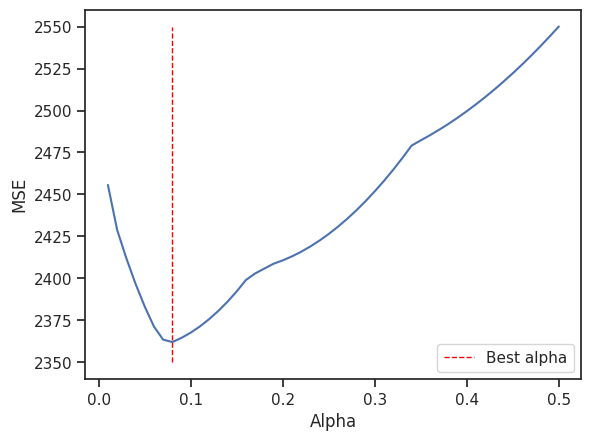

In [ ]:
#Grafiquemos cómo cambio el MSE a medida en que fuimos cambiando el alpha
import matplotlib.pyplot as plt

x = alphas
y = mse_alphas

plt.plot(x, y)
plt.vlines(x=0.08, ymin=2350, ymax=2550, colors='red', ls='--', lw=1, label='Best alpha')
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Ajustamos el modelo con el mejor alpha que encontramos y medimos el error en test
reg_lasso = Lasso(alpha=0.08)
reg_lasso.fit(X_train, y_train)

# Predicciones en el conjunto de testeo para Lasso
y_test_pred_lasso = reg_lasso.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_lassoCV = mean_squared_error(y_test, y_test_pred_lasso)

print("Error cuadrático medio (Lasso):", mse_lasso)

Error cuadrático medio (Lasso): 2550.041233010833


## Validación cruzada

Muchas veces hacer una separación en tres conjuntos de datos: entrenamiento, validación y testeo puede no ser la mejor opción cuanto tenemos pocos datos. Para crear buenos modelos, queremos utilizar la mayor cantidad posible de datos para el entrenamiento disponibles. Sin embargo, si el conjunto de validación es pequeño, proporcionará una estimación relativamente ruidosa del rendimiento predictivo. Una solución a este dilema es la **validación cruzada**.

La **validación cruzada** o **K-fold cross-validation** es necesaria porque el objetivo del aprendizaje automático es construir modelos que puedan generalizar a datos nuevos que no han sido vistos previamente. Si se evalúa el modelo solo en el conjunto de entrenamiento, el modelo podría sobreajustarse (ajustarse demasiado a los datos de entrenamiento) y no ser capaz de generalizar bien a datos nuevos.

Con la validación cruzada, se puede evaluar el rendimiento del modelo en datos que no se utilizaron para entrenar el modelo, lo que permite estimar el rendimiento del modelo en datos nuevos. Además, la validación cruzada permite comparar diferentes modelos y seleccionar el mejor modelo en función de su capacidad de generalización.

![](https://drive.google.com/uc?export=view&id=1VHLxKi16ROOw3zMfkENUE1NCBrSwX8RP)


### Eligiendo $\alpha$ con Cross Validation

Scikit-learn nos permite elegir el valor de alpha para Ridge y Lasso utilizando cross-validation con los metodos: [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) y [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Estos metodos lo que hacen es dado un conjunto de alfas y una cantidad de folds elegir el mejor de los alphas y con dicho alphas ajustar el modelo de nuevo a todos los datos.

In [ ]:
# Al hacer crossvalidation dentro de la funcion RidgeCV() o LassoCV() no es necesario dividir nuestro dataset en entrenamiento,
# validacion y testeo. Simplemente alcanza con dividirlo en entrenamiento y testeo.

X = diabetes.drop('target', axis=1)
y = diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Vamos dividir nuestro conjunto de entrenamiento en 5 folds.

#Definimos los alpha que queremos probar
alphas = np.arange(0.01, 0.51, 0.01)

#Modelo Ridge
reg_ridgeCV =RidgeCV(alphas=alphas, cv=5)
reg_ridgeCV.fit(X_train, y_train)

#Modelo Lasso
reg_lassoCV = LassoCV(alphas=alphas, cv=5)
reg_lassoCV.fit(X_train, y_train)

In [ ]:
# Predicciones en el conjunto de testeo para Ridge
y_test_pred_ridgeCV = reg_ridgeCV.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_ridgeCV = mean_squared_error(y_test, y_test_pred_ridgeCV)

print("Mejor alpha encontrado:", reg_ridgeCV.alpha_)
print("Error cuadrático medio (RidgeCV):", mse_ridgeCV)

Mejor alpha encontrado: 0.01
Error cuadrático medio (RidgeCV): 2819.688330911985


In [ ]:
# Predicciones en el conjunto de testeo para Lasso
y_test_pred_lassoCV = reg_lassoCV.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_lassoCV = mean_squared_error(y_test, y_test_pred_lassoCV)

print("Mejor alpha encontrado:", reg_lassoCV.alpha_)
print("Error cuadrático medio (LassoCV):", mse_lassoCV)

Mejor alpha encontrado: 0.01
Error cuadrático medio (LassoCV): 2814.060704553208
